<a href="https://colab.research.google.com/github/harshkv312001/Python-ML-model-Project/blob/main/Python%20Mini%20project%20(world_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
world_ML = pd.read_csv("/content/2019.csv",index_col='Overall rank')
world_ML

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [ ]:
world_ML.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
world_ML.isnull().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

**Correlation of the Variables excluding the score and country variables.**

In [ ]:
world_ML.drop(['Score'],axis=1)
world_ML.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


**The given heatmap shows a linear relation between variables as a result of a matrix.**

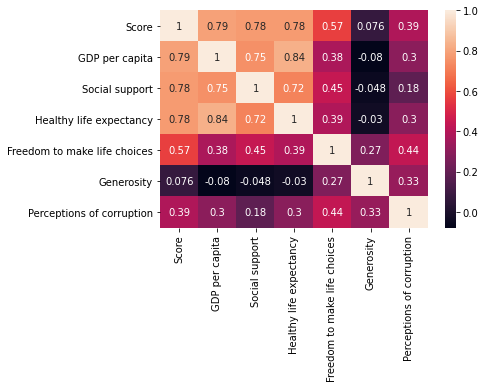

In [4]:
heat_map = sns.heatmap(world_ML.corr(),annot=True)

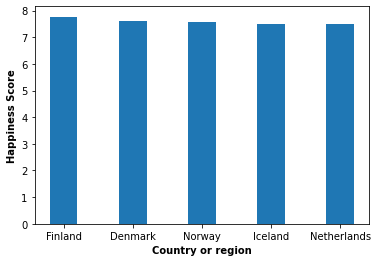

In [ ]:
a_xaxis = world_ML['Country or region'].iloc[:5]
b_yaxis = world_ML['Score'].iloc[:5]
#plt.ylim(0,8)

ticks = [0,1,2,3,4,5,6,7,8]

plt.xlabel('Country or region', weight='bold')
plt.ylabel('Happiness Score', weight='bold' )

plt.yticks(ticks)
plt.bar(a_xaxis,b_yaxis,width=0.4)
plt.show()

**This scatter plot shows a near linear relation between GDP and Happiness score**


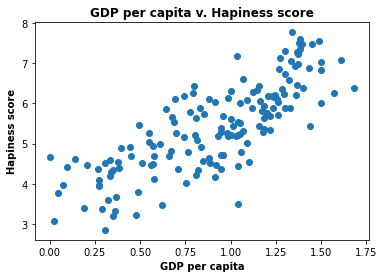

In [ ]:
c_xaxis = world_ML['GDP per capita']
d_yaxis = world_ML['Score']

plt.scatter(c_xaxis, d_yaxis)
plt.xlabel('GDP per capita', weight='bold')
plt.ylabel('Hapiness score', weight='bold')
plt.title('GDP per capita v. Hapiness score', weight='bold')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
X = world_ML['GDP per capita'].to_numpy()
X = X.reshape(-1, 1) 
y = world_ML['Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
print(f'Score of Linear Regression Model: {lr.score(X_test, y_test) * 100}%')

Score of Linear Regression Model: 74.67966705681263%
